In [1]:
import numpy as np 
import pandas as pd

In [3]:
engdata = pd.read_csv('engine_data.csv')
engdata.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


In [4]:
engdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


In [5]:
engdata['Engine Condition'].unique()


array([1, 0], dtype=int64)

In [6]:
engdata.describe()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
count,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000
mean,791.239263,3.303775,6.655615,2.335369,77.643420,78.427433,0.630509
std,267.611193,1.021643,2.761021,1.036382,3.110984,6.206749,0.482679
min,61.000000,0.003384,0.003187,0.002483,71.321974,61.673325,0.000000
25%,593.000000,2.518815,4.916886,1.600466,75.725990,73.895421,0.000000
50%,746.000000,3.162035,6.201720,2.166883,76.817350,78.346662,1.000000
75%,934.000000,4.055272,7.744973,2.848840,78.071691,82.915411,1.000000
max,2239.000000,7.265566,21.138326,7.478505,89.580796,195.527912,1.000000


In [7]:
engdata.columns

Index(['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure',
       'lub oil temp', 'Coolant temp', 'Engine Condition'],
      dtype='object')

In [8]:
columns = engdata.columns
for column in columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = engdata[column].quantile(0.25)
    Q3 = engdata[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter the data to remove outliers
    engdata = engdata[(engdata[column] >= lower_bound) & (engdata[column] <= upper_bound)]

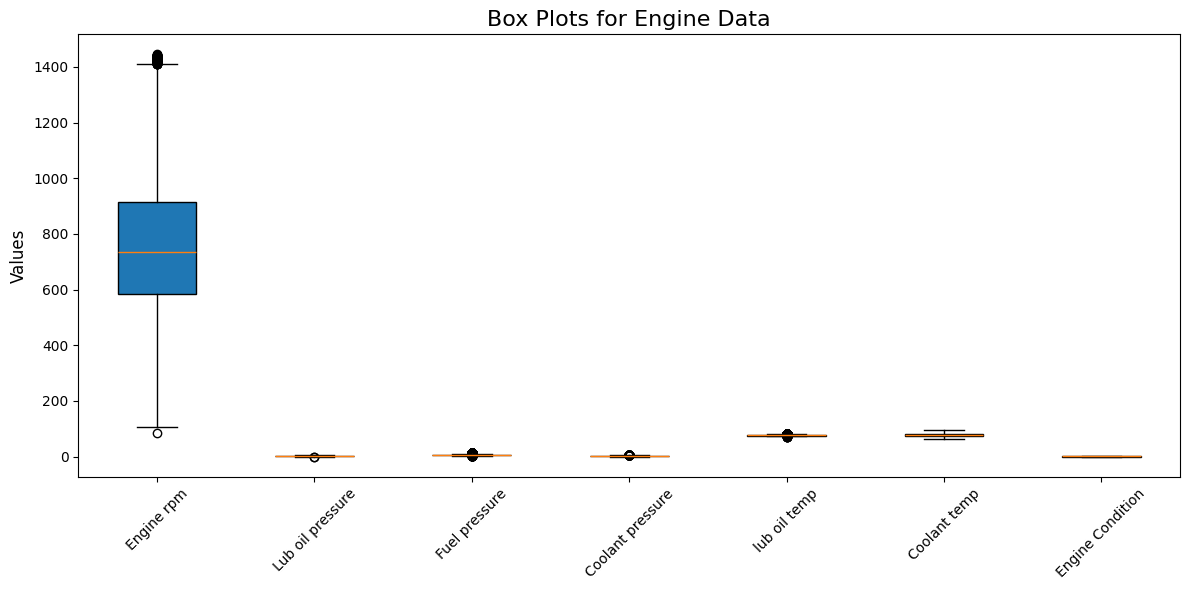

In [9]:
import matplotlib.pyplot as plt

# Assuming `engdata` is a predefined DataFrame
columns_to_plot = [
    'Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure',
    'lub oil temp', 'Coolant temp', 'Engine Condition'
]

# Extracting data for the box plot
data_to_plot = engdata[columns_to_plot]

# Creating the box plot
plt.figure(figsize=(12, 6))
plt.boxplot(data_to_plot.values, labels=columns_to_plot, patch_artist=True)

# Customizing the plot
plt.title('Box Plots for Engine Data', fontsize=16)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=45, fontsize=10)  # Rotating x-axis labels for readability

# Display the plot
plt.tight_layout()
plt.show()

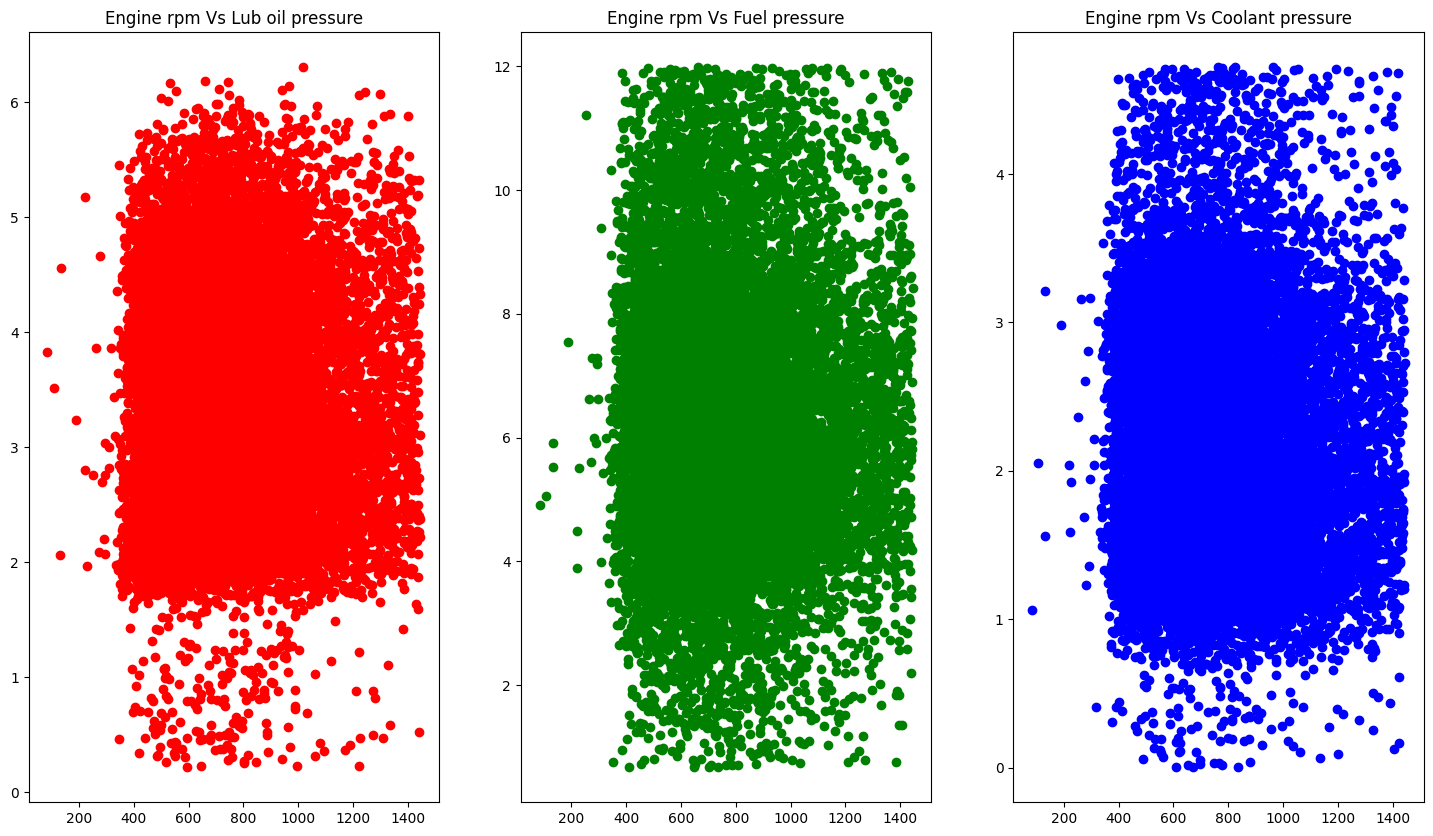

In [10]:
import matplotlib.pyplot as plt

# Creating subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 10))  

# Creating a scatter plot

x = engdata['Engine rpm']
y1 = engdata['Lub oil pressure']
y2 = engdata['Fuel pressure']
y3 = engdata['Coolant pressure']


# Plotting data in each subplot
axs[0].scatter(x, y1, color='red')
axs[0].set_title('Engine rpm Vs Lub oil pressure')


# Plotting data in each subplot
axs[1].scatter(x, y2, color='green')
axs[1].set_title('Engine rpm Vs Fuel pressure')

# Plotting data in each subplot
axs[2].scatter(x, y3, color='blue')
axs[2].set_title('Engine rpm Vs Coolant pressure')


# Displaying the plot
plt.show()

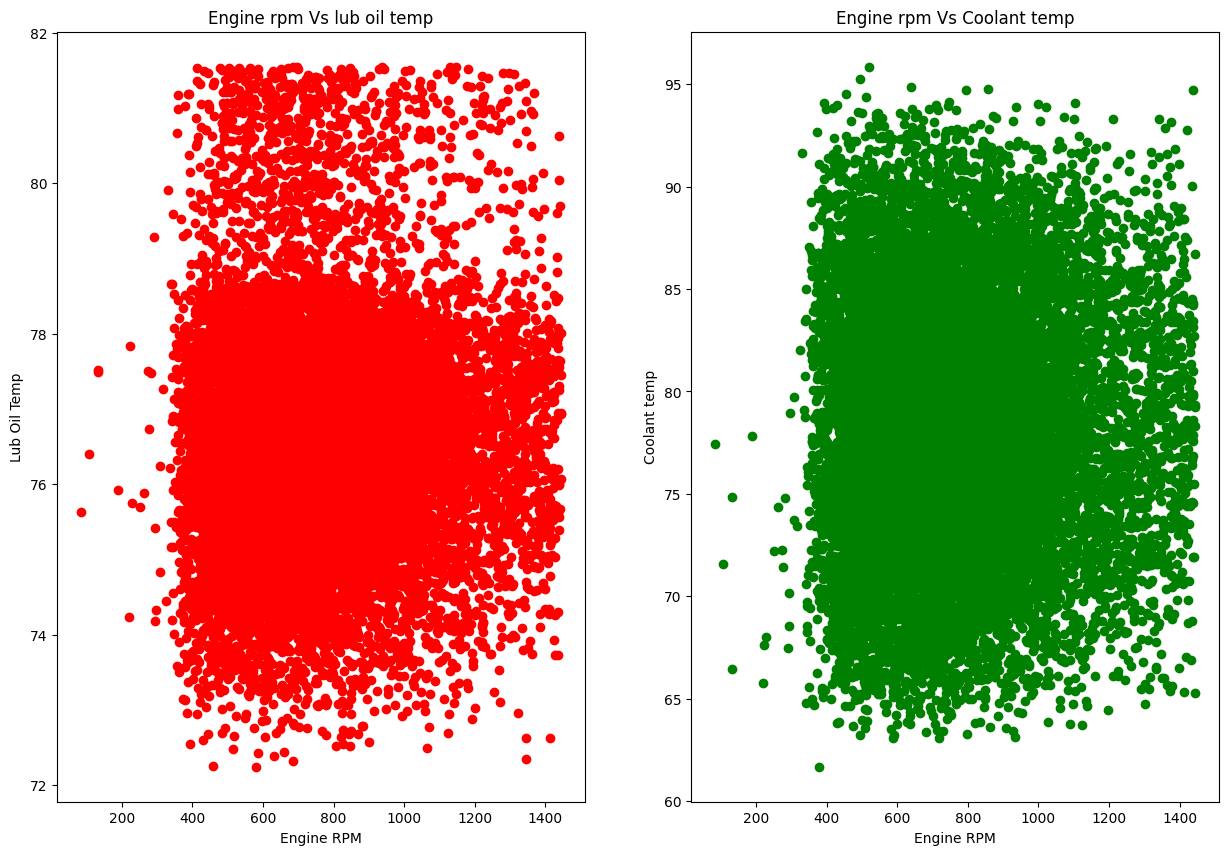

In [11]:
import matplotlib.pyplot as plt

# Creating subplots
fig, axtmps= plt.subplots(1, 2, figsize=(15, 10))  

# Creating a scatter plot

rpm = engdata['Engine rpm']
temp1 = engdata['lub oil temp']
temp2 = engdata['Coolant temp']


# Plotting data in each subplot
axtmps[0].scatter(rpm, temp1, color='red')
axtmps[0].set_title('Engine rpm Vs lub oil temp')
axtmps[0].set_xlabel('Engine RPM')
axtmps[0].set_ylabel('Lub Oil Temp')


# Plotting data in each subplot
axtmps[1].scatter(rpm, temp2, color='green')
axtmps[1].set_title('Engine rpm Vs Coolant temp')
axtmps[1].set_xlabel('Engine RPM')
axtmps[1].set_ylabel('Coolant temp')

# Displaying the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


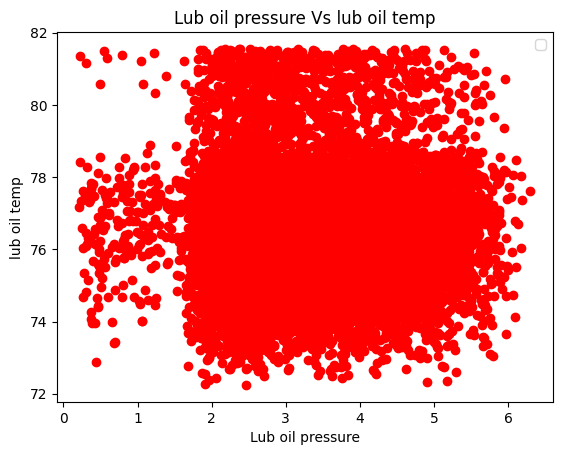

In [12]:
import matplotlib.pyplot as plt

# Creating subplots
# fig, axs = plt.subplots(2, 2, figsize=(10, 8))  

# Creating a scatter plot

lbp = engdata['Lub oil pressure']
lbt = engdata['lub oil temp']


# Plotting data in each subplot
plt.scatter(lbp, lbt, color='red')


# Adding labels and title
plt.xlabel('Lub oil pressure')
plt.ylabel('lub oil temp')
plt.title('Lub oil pressure Vs lub oil temp')

# Adding a legend
plt.legend()

# Displaying the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


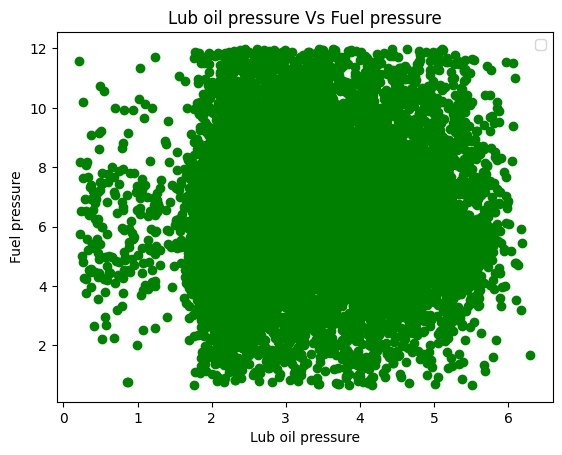

In [13]:
import matplotlib.pyplot as plt

# Creating subplots
# fig, axs = plt.subplots(2, 2, figsize=(10, 8))  

# Creating a scatter plot

lbp = engdata['Lub oil pressure']
flp = engdata['Fuel pressure']


# Plotting data in each subplot
plt.scatter(lbp, flp, color='green')


# Adding labels and title
plt.xlabel('Lub oil pressure')
plt.ylabel('Fuel pressure')
plt.title('Lub oil pressure Vs Fuel pressure')

# Adding a legend
plt.legend()

# Displaying the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


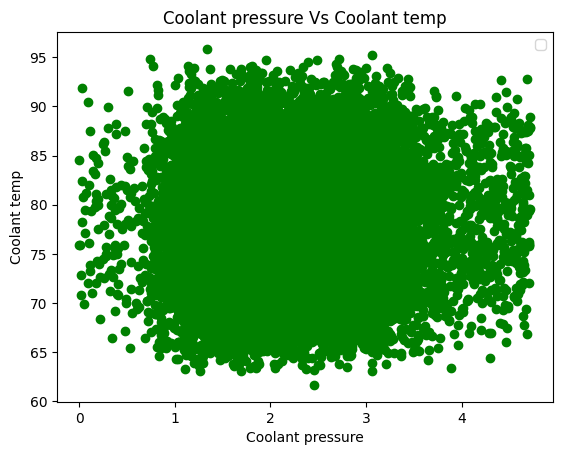

In [14]:
import matplotlib.pyplot as plt

# Creating subplots
# fig, axs = plt.subplots(2, 2, figsize=(10, 8))  

# Creating a scatter plot

lbp = engdata['Coolant pressure']
flp = engdata['Coolant temp']


# Plotting data in each subplot
plt.scatter(lbp, flp, color='green')


# Adding labels and title
plt.xlabel('Coolant pressure')
plt.ylabel('Coolant temp')
plt.title('Coolant pressure Vs Coolant temp')

# Adding a legend
plt.legend()

# Displaying the plot
plt.show()

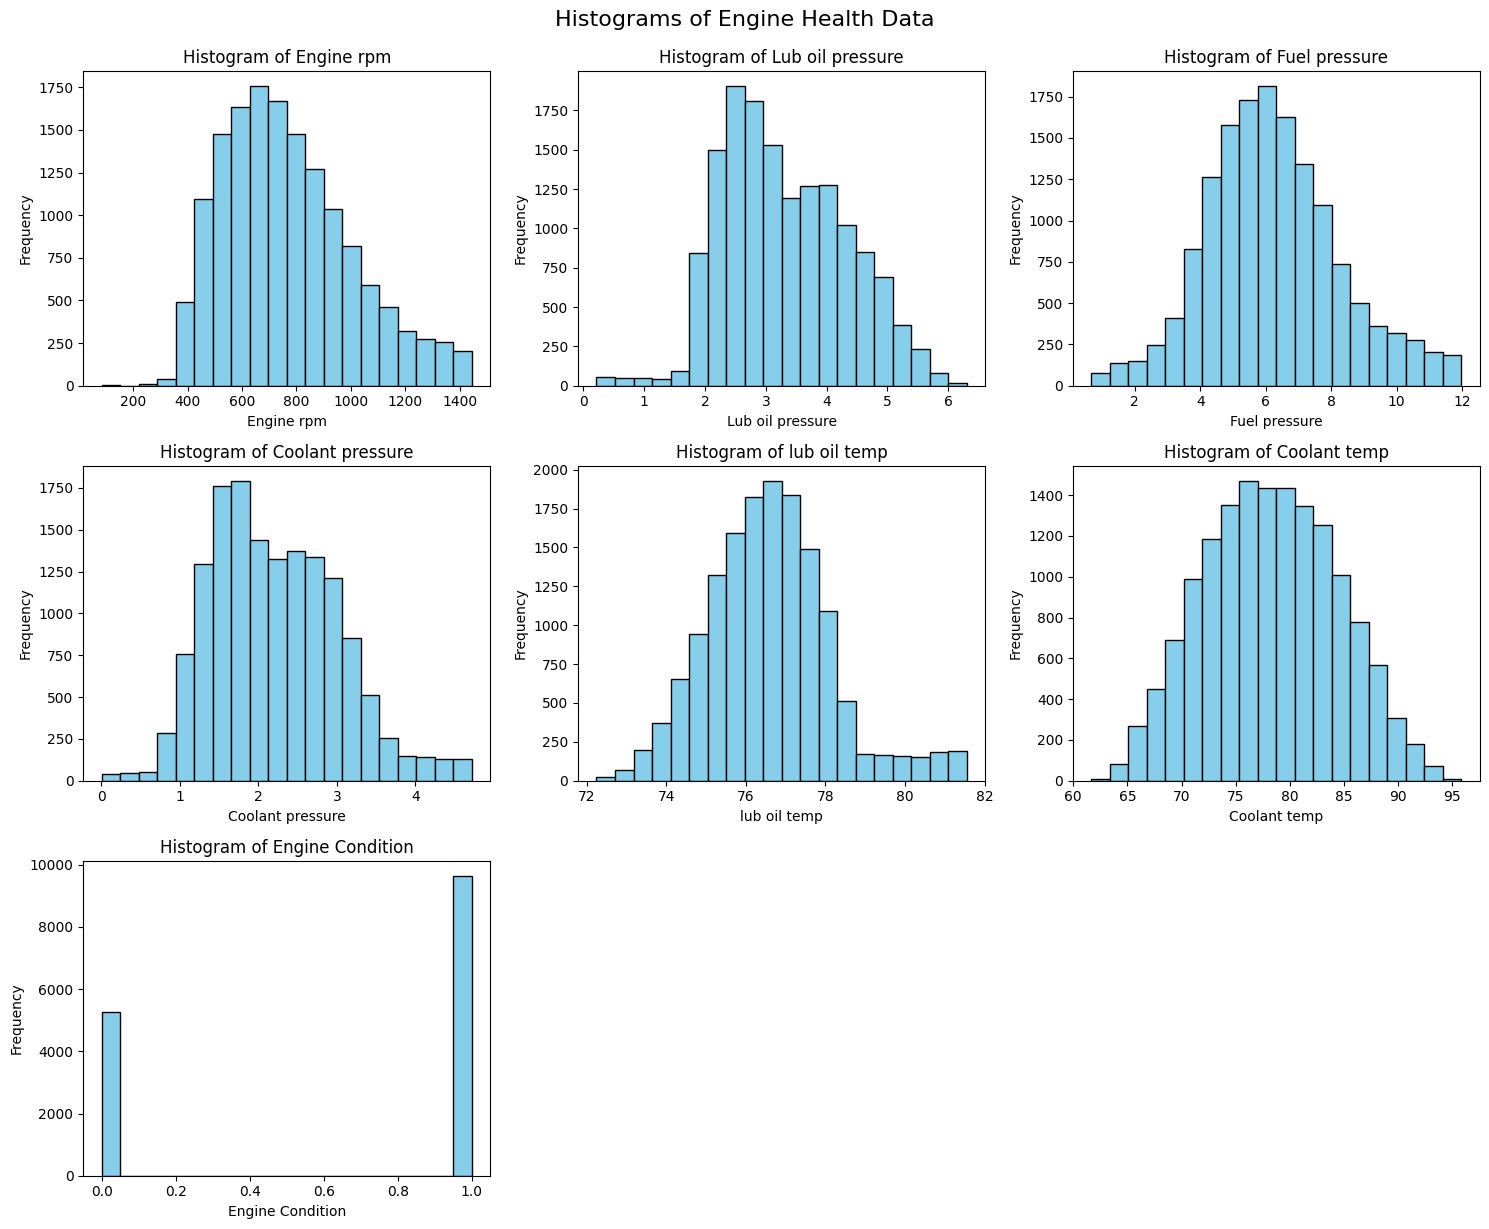

In [15]:
import matplotlib.pyplot as plt

# List of columns to plot
numerical_columns = [
    'Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure',
    'lub oil temp', 'Coolant temp', 'Engine Condition'
]

# Create histograms
plt.figure(figsize=(15, 12))  # Set figure size for all plots
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  # Create a 3x3 grid of subplots
    plt.hist(engdata[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}', fontsize=12)
    plt.xlabel(column, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)

plt.tight_layout()  # Adjust spacing
plt.suptitle('Histograms of Engine Health Data', fontsize=16, y=1.02)  # Add a main title
plt.show()

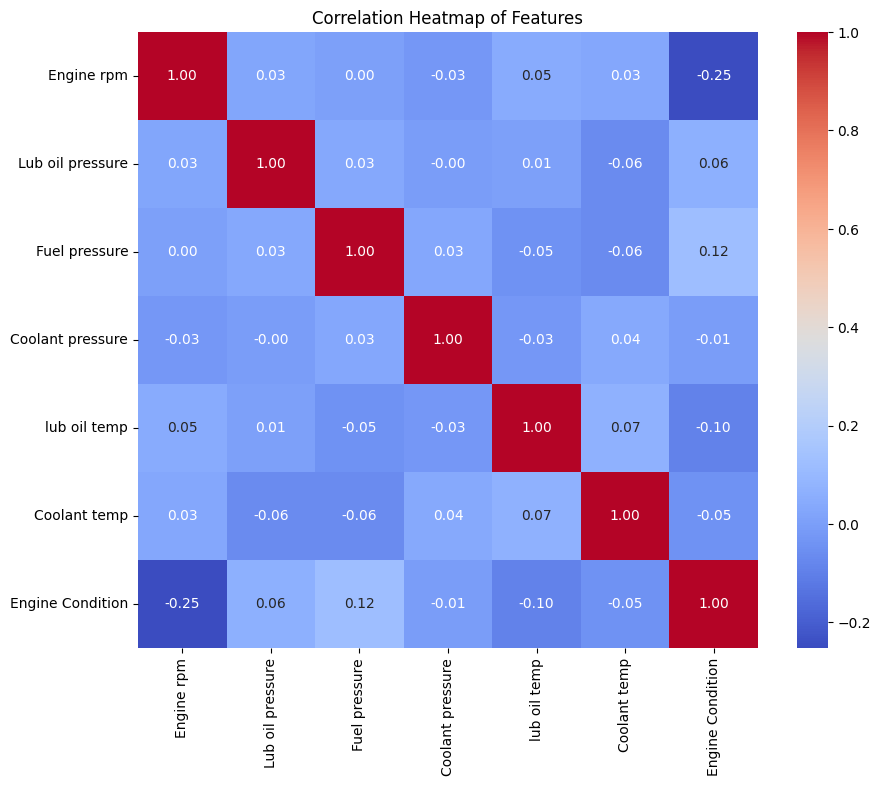

In [16]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(engdata.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

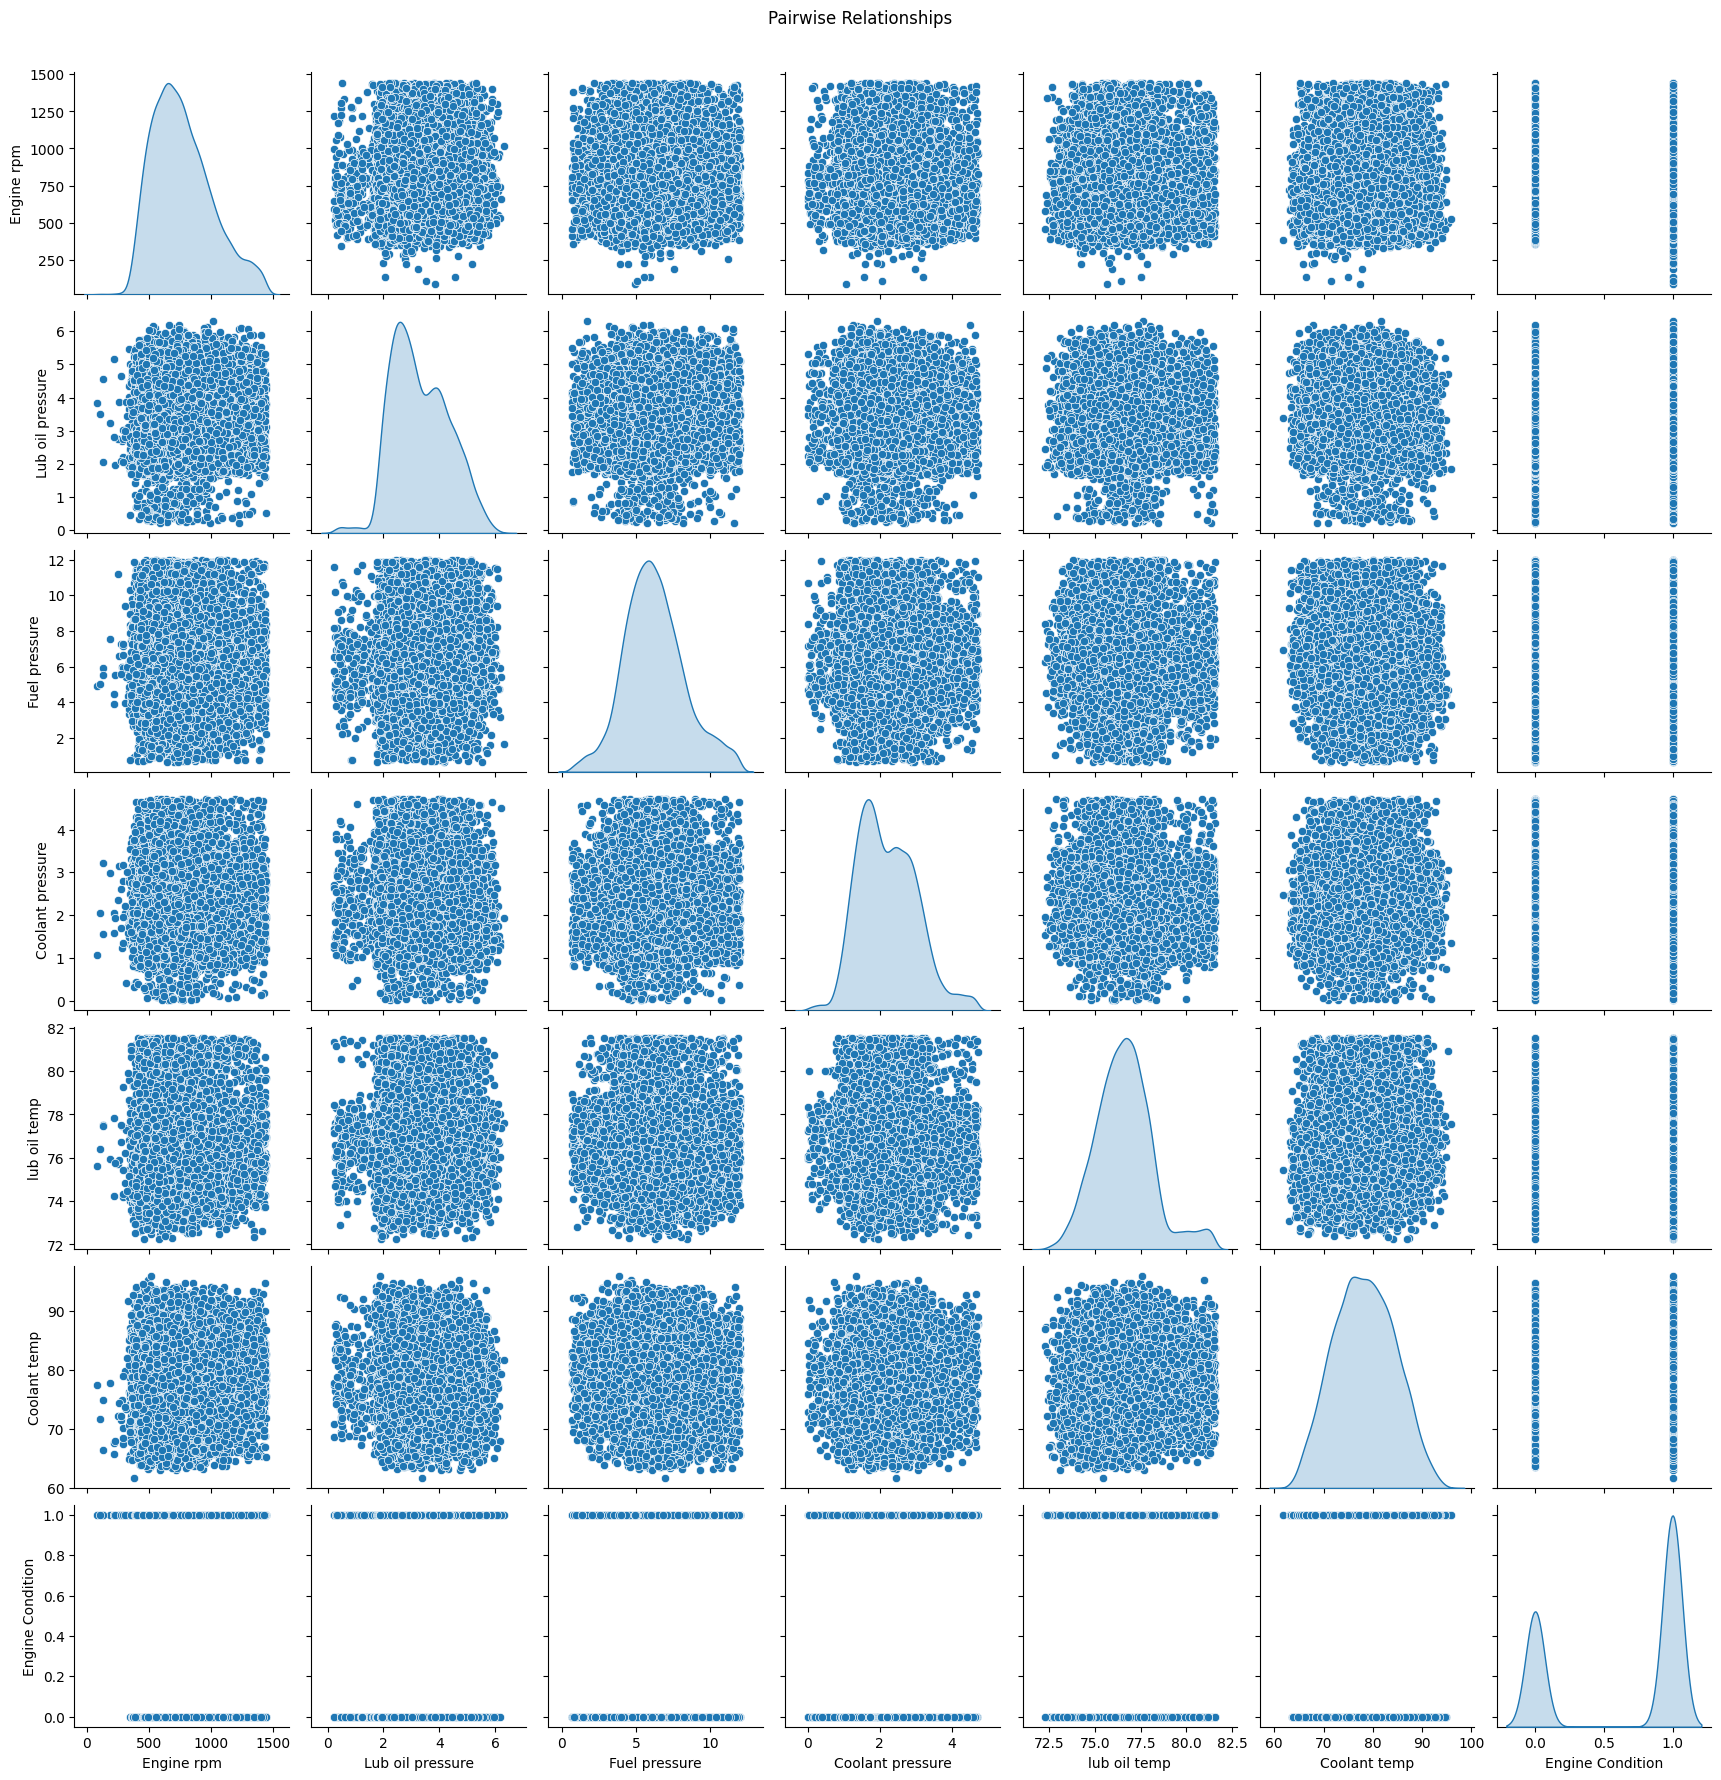

In [17]:
sns.pairplot(engdata, vars=numerical_columns, diag_kind='kde')
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

In [18]:
engdata.columns

Index(['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure',
       'lub oil temp', 'Coolant temp', 'Engine Condition'],
      dtype='object')

In [28]:
features = engdata[['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure', 'lub oil temp', 'Coolant temp']]

target = engdata['Engine Condition']

print("Features shape:", features.shape)
print("Target shape:", target.shape)
target, features

Features shape: (14884, 6)
Target shape: (14884,)


(2        1
 5        0
 7        1
 8        0
 9        0
         ..
 19529    0
 19530    1
 19532    1
 19533    1
 19534    1
 Name: Engine Condition, Length: 14884, dtype: int64,
        Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
 2             520          2.961746       6.553147          1.064347   
 5            1221          3.989226       6.679231          2.214250   
 7             729          3.845166      10.191126          2.362998   
 8             845          4.877239       3.638269          3.525604   
 9             824          3.741228       7.626214          1.301032   
 ...           ...               ...            ...               ...   
 19529         797          3.368795       6.057227          1.721997   
 19530         902          4.117296       4.981360          4.346564   
 19532         684          2.673344       4.927376          1.903572   
 19533         696          3.094163       8.291816          1.221729   
 19534     

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [23]:
from sklearn.metrics import accuracy_score, f1_score

In [25]:
knn_clf_pred = knn_clf.predict(X_test)

knn_clfaccuracy = accuracy_score(y_test, knn_clf_pred)
knn_clff1 = f1_score(y_test, knn_clf_pred)

print("Accuracy Score: ",knn_clfaccuracy)
print("F1 Score: ",knn_clff1)

Accuracy Score:  0.60900235136043
F1 Score:  0.711738484398217


In [26]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
rf_clf_pred = rf_clf.predict(X_test)

rf_clfaccuracy = accuracy_score(y_test, rf_clf_pred)
rf_clff1 = f1_score(y_test, rf_clf_pred)

print("Accuracy Score: ",rf_clfaccuracy)
print("F1 Score: ",rf_clff1)

Accuracy Score:  0.6553577426939873
F1 Score:  0.7566413662239089
